In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import multiprocessing
from torch import autograd
from fastai.conv_learner import *
from fasterai.images import *
from fasterai.dataset import *
from fasterai.visualize import *
from fasterai.loss import *
from fasterai.modules import *
from fasterai.wgan import *
from fasterai.generators import *
from fastai.torch_imports import *
from pathlib import Path
from itertools import repeat
import tensorboardX
torch.cuda.set_device(1)
plt.style.use('dark_background')
torch.backends.cudnn.benchmark=True


/home/jason/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/jason/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/jason/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/jason/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
DATA_PATH = Path('data/imagenet/ILSVRC/Data/CLS-LOC')
TRAIN_SOURCE_PATH = DATA_PATH/'train'
proj_id = 'bw2color'

dpath = DATA_PATH/(proj_id + '_8212_D.h5')
gpath = DATA_PATH/(proj_id + '_8212_G.h5')
keep_pct=1.0
bs=64
sz=64
lr=1e-4
lrs = np.array([lr/1000,lr/100,lr])
torch.backends.cudnn.benchmark=True

## Training

In [4]:
netG = ResnetImageModifier(nf=128).cuda()
#load_model(netG, gpath)
netD = FeatureCritic(sz=sz,nf=128).cuda()
#load_model(netD, dpath)

/media/jason/Projects/Deep Learning/Deep Learning Projects/Jupyter Experiments/1_BlackWhiteToColor/fasterai/modules.py:32: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  subkernel = init(subkernel)


In [5]:
md = get_matched_image_model_data(image_size=sz, batch_size=bs, root_data_path=DATA_PATH, train_root_path=TRAIN_SOURCE_PATH, proj_id=proj_id, keep_pct=keep_pct)

In [6]:
trainer = WGANTrainer(netD=netD, netG=netG, md=md, bs=bs, sz=sz, dpath=dpath, gpath=gpath)

  5%|▌         | 1010/19819 [13:06<7:57:04,  1.52s/it] 
WDist -1605.1942138671875; RScore 796.3357543945312; FScore -808.8584594726562; GCount: 10; GPenalty: 15.815488815307617; GCost: 814.2476196289062
 10%|█         | 2020/19819 [26:11<1:50:33,  2.68it/s]
WDist -3786.4482421875; RScore 1901.2989501953125; FScore -1885.149169921875; GCount: 20; GPenalty: 28.687009811401367; GCost: 1900.3358154296875
 13%|█▎        | 2555/19819 [32:38<1:53:01,  2.55it/s]
WDist -5206.845703125; RScore 2626.00244140625; FScore -2580.84326171875; GCount: 30; GPenalty: 86.21437072753906; GCost: 2595.886962890625
 13%|█▎        | 2615/19819 [33:35<4:09:57,  1.15it/s]
WDist -5392.11474609375; RScore 2678.44970703125; FScore -2713.6650390625; GCount: 40; GPenalty: 133.53759765625; GCost: 2669.202880859375
 13%|█▎        | 2675/19819 [34:20<6:19:02,  1.33s/it]
WDist -5515.84375; RScore 2787.076416015625; FScore -2728.767333984375; GCount: 50; GPenalty: 84.58372497558594; GCost: 2771.71923828125
 14%|█▍        

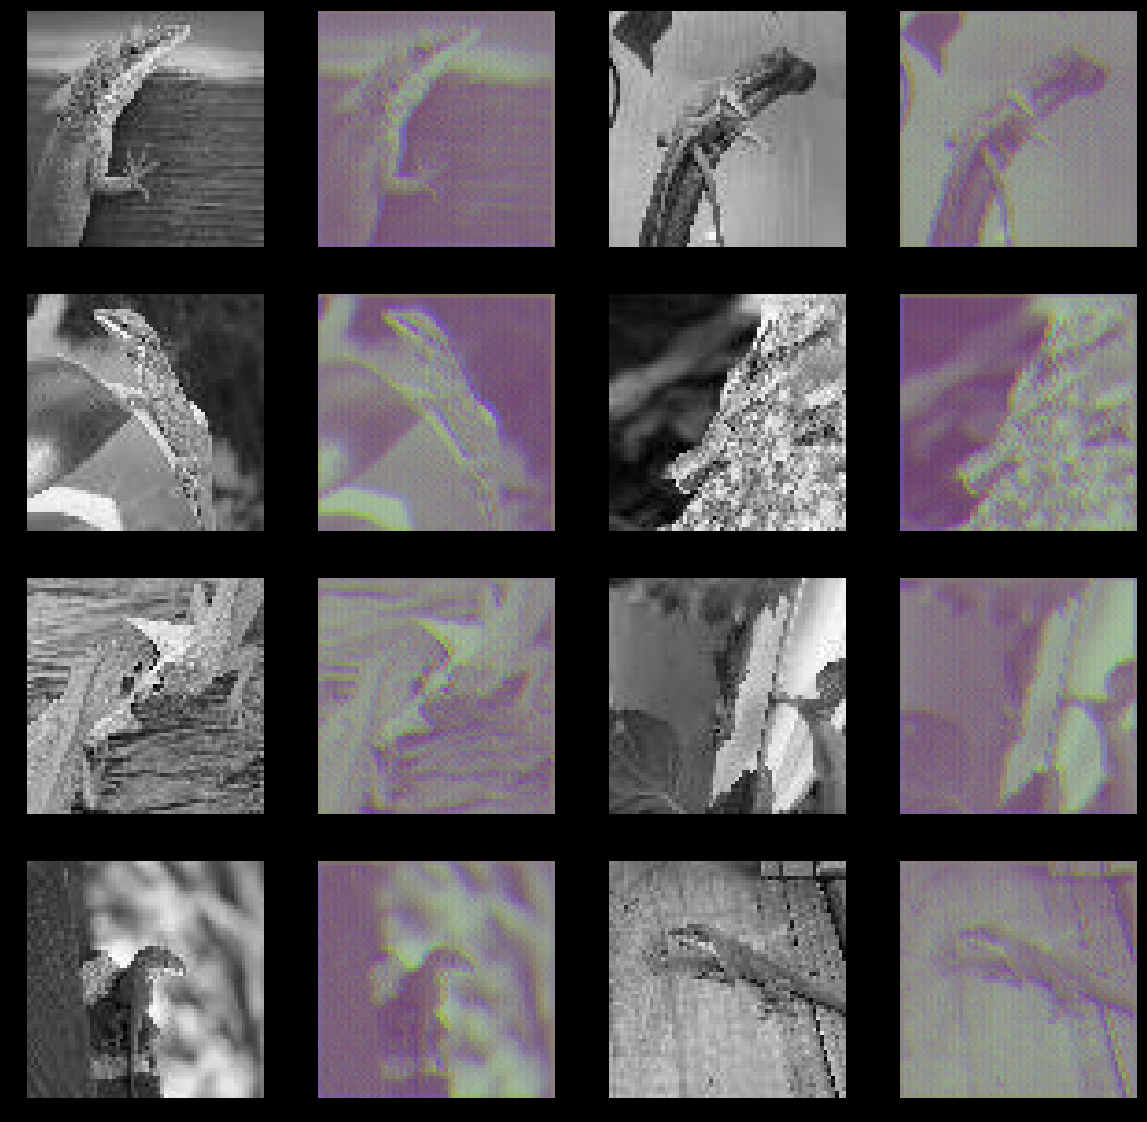

 15%|█▌        | 3035/19819 [39:00<1:54:01,  2.45it/s]
WDist -6464.5087890625; RScore 3216.09033203125; FScore -3248.418212890625; GCount: 110; GPenalty: 167.59727478027344; GCost: 3156.161376953125
 16%|█▌        | 3095/19819 [39:34<1:39:29,  2.80it/s]
WDist -6665.51416015625; RScore 3350.97314453125; FScore -3314.541015625; GCount: 120; GPenalty: 99.34637451171875; GCost: 3308.98486328125
 16%|█▌        | 3155/19819 [40:19<6:30:18,  1.41s/it]
WDist -6778.9599609375; RScore 3418.185546875; FScore -3360.774658203125; GCount: 130; GPenalty: 116.32514190673828; GCost: 3364.06591796875
 16%|█▌        | 3215/19819 [41:00<1:46:22,  2.60it/s]
WDist -6992.95703125; RScore 3509.03662109375; FScore -3483.92041015625; GCount: 140; GPenalty: 130.70361328125; GCost: 3411.79248046875
 17%|█▋        | 3275/19819 [41:51<1:52:49,  2.44it/s]
WDist -7079.078125; RScore 3508.6611328125; FScore -3570.4169921875; GCount: 150; GPenalty: 200.01812744140625; GCost: 3475.046142578125
 17%|█▋        | 3335/1981

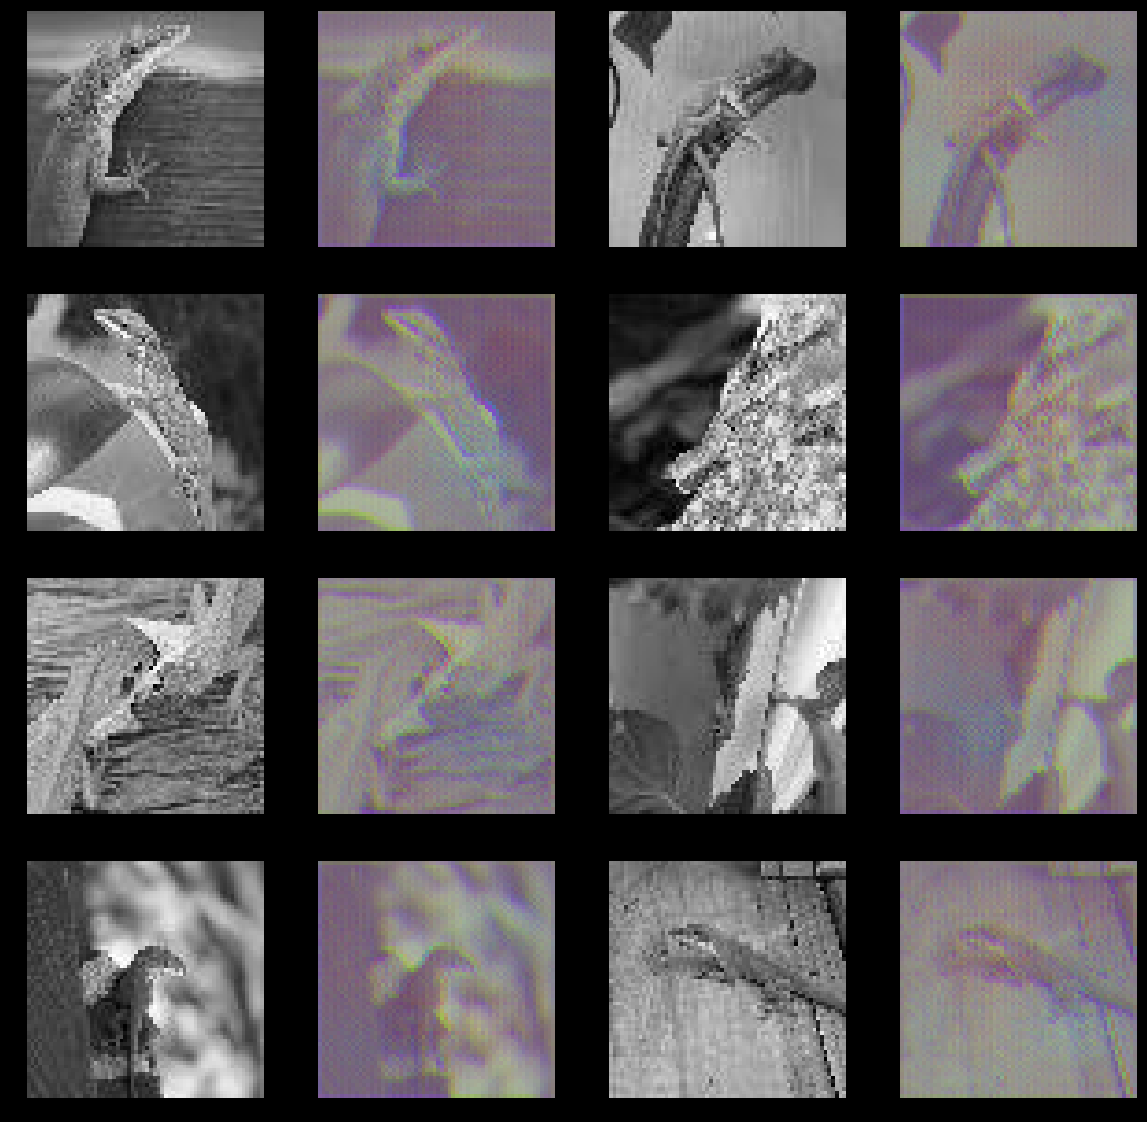

 18%|█▊        | 3635/19819 [46:50<1:36:48,  2.79it/s]
WDist -7979.9052734375; RScore 4027.102294921875; FScore -3952.802734375; GCount: 210; GPenalty: 227.63047790527344; GCost: 3886.4150390625
 19%|█▊        | 3695/19819 [47:37<1:44:52,  2.56it/s]
WDist -8240.1162109375; RScore 4217.20849609375; FScore -4022.907470703125; GCount: 220; GPenalty: 180.2344512939453; GCost: 4056.38037109375
 19%|█▉        | 3755/19819 [48:05<1:35:27,  2.80it/s]
WDist -8411.85546875; RScore 4255.33642578125; FScore -4156.51953125; GCount: 230; GPenalty: 212.95423889160156; GCost: 3819.34765625
 19%|█▉        | 3815/19819 [48:54<2:14:55,  1.98it/s]
WDist -7380.82275390625; RScore 4299.44482421875; FScore -3081.3779296875; GCount: 240; GPenalty: 226.0499725341797; GCost: 4164.3134765625
 20%|█▉        | 3875/19819 [49:50<10:12:19,  2.30s/it]
WDist -8899.009765625; RScore 4458.3193359375; FScore -4440.69091796875; GCount: 250; GPenalty: 233.190673828125; GCost: 4363.47314453125
 20%|█▉        | 3935/19819 [5

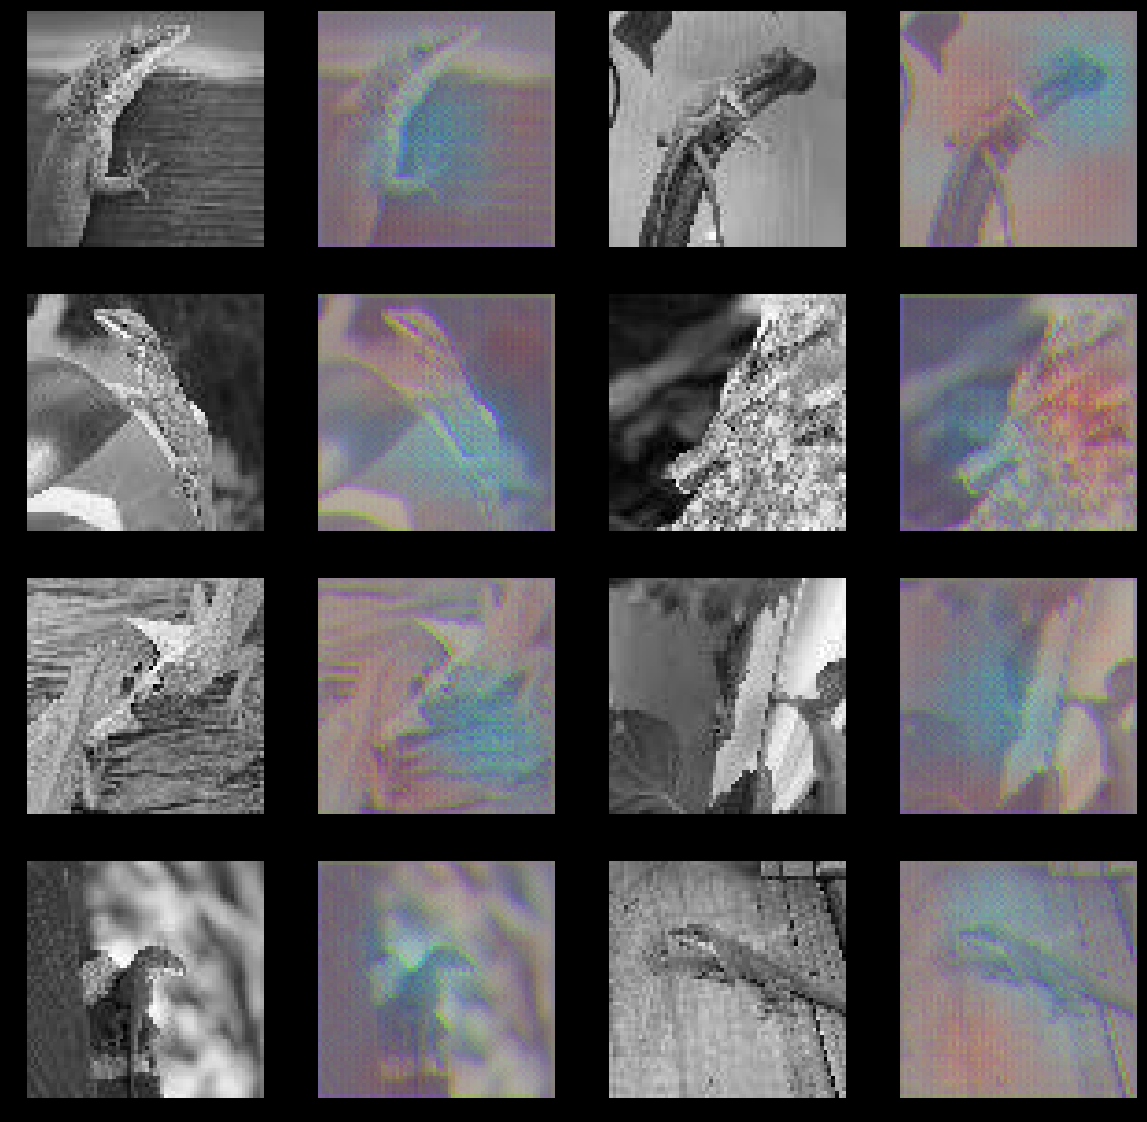

 21%|██▏       | 4235/19819 [54:22<1:44:33,  2.48it/s]
WDist -9900.39453125; RScore 4854.0537109375; FScore -5046.34033203125; GCount: 310; GPenalty: 221.35549926757812; GCost: 5103.466796875
 22%|██▏       | 4295/19819 [54:50<1:54:35,  2.26it/s]
WDist -10244.9794921875; RScore 5129.10498046875; FScore -5115.87451171875; GCount: 320; GPenalty: 339.69732666015625; GCost: 4972.93212890625
 22%|██▏       | 4355/19819 [55:36<1:32:23,  2.79it/s]
WDist -10412.8447265625; RScore 5311.9541015625; FScore -5100.890625; GCount: 330; GPenalty: 274.3941955566406; GCost: 5312.9853515625
 22%|██▏       | 4415/19819 [56:08<1:35:27,  2.69it/s]
WDist -7794.255859375; RScore 5460.91015625; FScore -2333.345703125; GCount: 340; GPenalty: 250.49755859375; GCost: 4667.0244140625
 23%|██▎       | 4475/19819 [56:59<1:30:53,  2.81it/s]
WDist -10619.931640625; RScore 5156.85986328125; FScore -5463.07177734375; GCount: 350; GPenalty: 471.96484375; GCost: 5131.6708984375
 23%|██▎       | 4535/19819 [58:00<2:24:07,

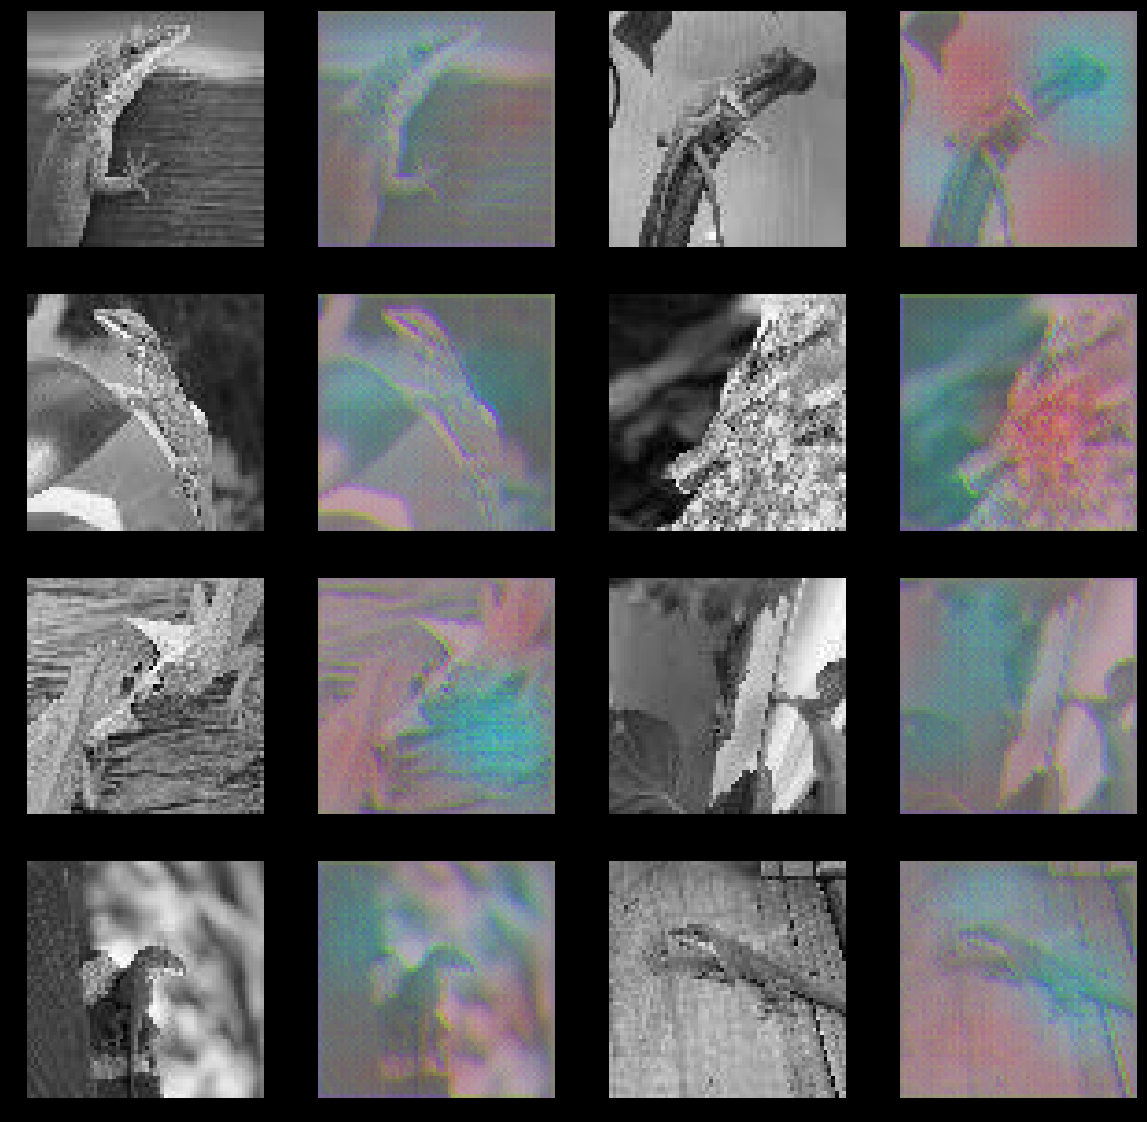

 24%|██▍       | 4835/19819 [1:02:12<5:44:14,  1.38s/it]
WDist -12200.6396484375; RScore 6032.78515625; FScore -6167.8544921875; GCount: 410; GPenalty: 390.37249755859375; GCost: 6027.609375
 25%|██▍       | 4895/19819 [1:02:38<1:29:00,  2.79it/s]
WDist -11816.9765625; RScore 6014.6357421875; FScore -5802.34033203125; GCount: 420; GPenalty: 766.923828125; GCost: 6326.01708984375
 25%|██▌       | 4955/19819 [1:03:28<1:42:25,  2.42it/s]
WDist -12362.798828125; RScore 6414.099609375; FScore -5948.69921875; GCount: 430; GPenalty: 392.2421875; GCost: 6456.1650390625
 25%|██▌       | 5015/19819 [1:04:21<3:16:48,  1.25it/s]
WDist -13089.412109375; RScore 6521.1259765625; FScore -6568.2861328125; GCount: 440; GPenalty: 498.61328125; GCost: 6549.498046875
 26%|██▌       | 5075/19819 [1:05:09<5:16:54,  1.29s/it]
WDist -12566.390625; RScore 6059.88427734375; FScore -6506.5068359375; GCount: 450; GPenalty: 360.8282470703125; GCost: 6530.55615234375
 26%|██▌       | 5135/19819 [1:05:59<1:33:12,  2.

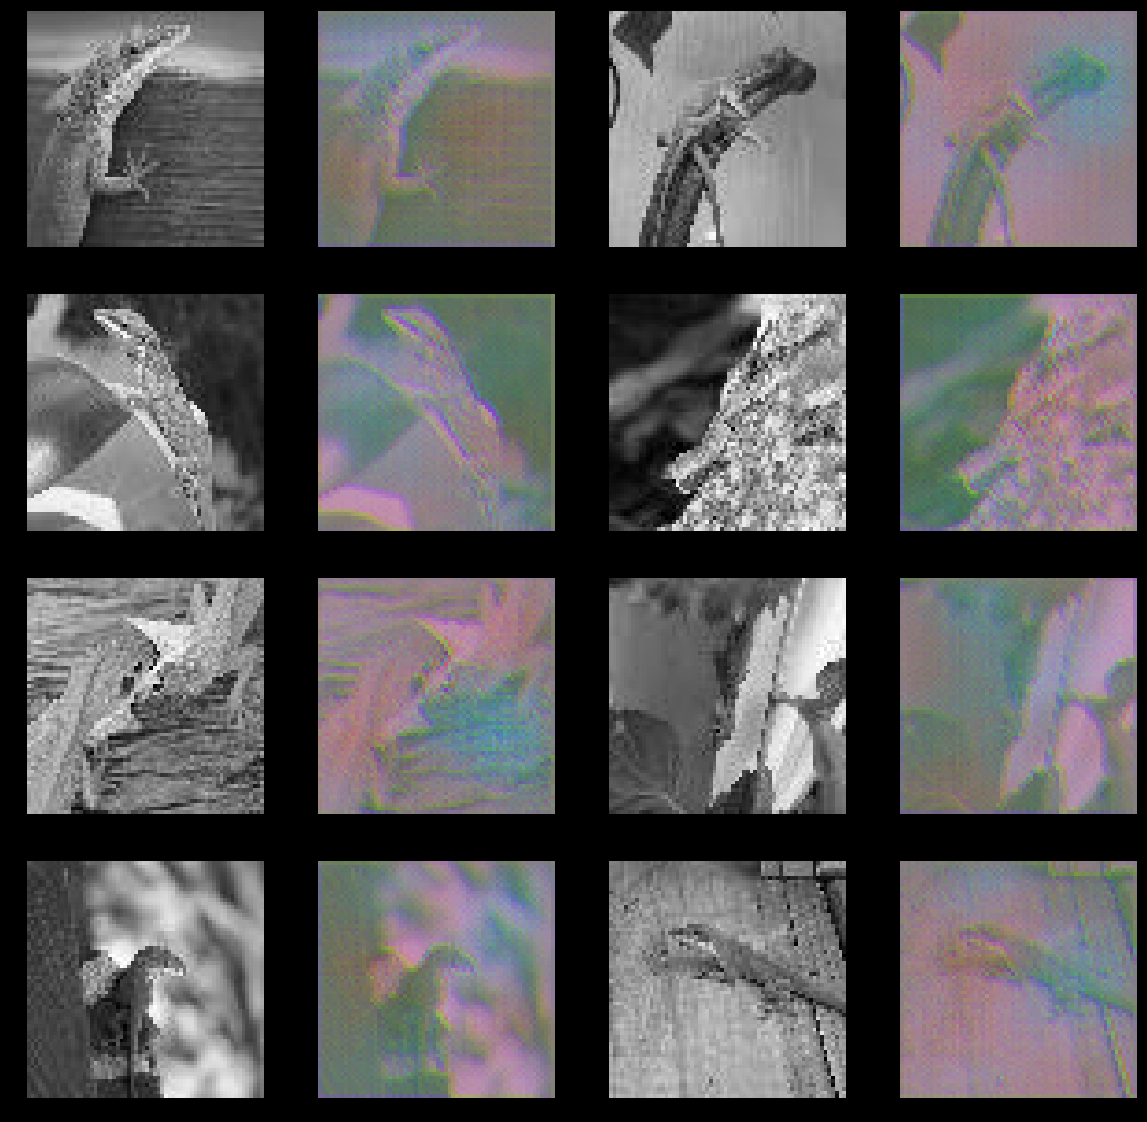

 28%|██▊       | 5509/19819 [1:09:07<1:45:35,  2.26it/s]

In [ ]:
trainer.train(lrs_critic=lrs, lrs_gen=lrs, clr_critic=(5,8), clr_gen=(5,8), cycle_len=1, epochs=1, first=True)